In [128]:
import glob 
import os 
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

In [129]:
parent_dir = 'E:\Sem 6\CV\Assignment 2\q4_dataset\original'

In [130]:
images = os.listdir('q4_dataset\original')

In [131]:
print(images)

['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [132]:
board = (8,6)
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 30 , 0.001)

In [133]:
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 

In [134]:
# Defining the world coordinates for 3D points
objp = np.zeros((1, board[0] * board[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:board[0], 0:board[1]].T.reshape(-1, 2)
prev_img_shape = None

In [135]:
save_pth1 = 'q4_dataset\with_corners'

In [136]:
for image in images : 
    pth = os.path.join(parent_dir,image)
    # print(pth)
    img = cv2.imread(pth)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, board, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)  
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, board, corners2, ret)
     
    cv2.imwrite(os.path.join(save_pth1,image),img)


In [137]:

h,w = img.shape[:2]

In [138]:
"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("Distortion : \n")
print(dist)
print("Rotation Vectors : \n")
print(rvecs)
print("Translation Vectors : \n")
print(tvecs)

Camera matrix : 

[[2.40512917e+03 0.00000000e+00 1.45575761e+02]
 [0.00000000e+00 2.51384275e+03 3.82405570e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion : 

[[ 5.61266206e-01 -2.79864931e+01  1.52101063e-02  1.20389566e-02
   1.47216665e+02]]
Rotation Vectors : 

(array([[-0.05497964],
       [-0.94316707],
       [-0.00099224]]), array([[-0.09800508],
       [ 1.30176156],
       [-0.02938678]]), array([[ 2.84330296e-02],
       [-6.40925760e-01],
       [-4.51766056e-04]]), array([[ 0.03080087],
       [-0.48506802],
       [ 0.02125182]]), array([[0.00043236],
       [0.40935588],
       [0.00074027]]), array([[-0.02636912],
       [-1.05302587],
       [-0.01250301]]), array([[-0.02735916],
       [ 0.42335653],
       [ 0.0189986 ]]), array([[-0.14439937],
       [ 0.2790428 ],
       [ 0.038425  ]]), array([[-0.25556759],
       [ 0.14939772],
       [ 0.0020218 ]]), array([[-3.75662978e-02],
       [ 5.32838305e-01],
       [-4.39394349e-04]]), array([[-0.04

In [139]:
np.savetxt(os.path.join('q4_dataset','camera_matrix.txt'), mtx)

# Save distortion coefficients to a text file
np.savetxt(os.path.join('q4_dataset','distortion_coefficients.txt'), dist)

# Save rotation vectors to a text file
with open((os.path.join('q4_dataset','rotation_vectors.txt')), 'w') as file:
    for vec in rvecs:
        np.savetxt(file, vec)

# Save translation vectors to a text file
with open((os.path.join('q4_dataset','translation_vectors.txt')), 'w') as file:
    for vec in tvecs:
        np.savetxt(file, vec)


In [140]:
fx = mtx[0, 0]  # Focal length in x-direction
fy = mtx[1, 1]  # Focal length in y-direction
skew = mtx[0, 1]  # Skew parameter
cx = mtx[0, 2]  # Principal point x-coordinate
cy = mtx[1, 2]  # Principal point y-coordinate

# Print the intrinsic parameters
print("Estimated Intrinsic Camera Parameters:")
print("Focal Length (fx):", fx)
print("Focal Length (fy):", fy)
print("Skew Parameter:", skew)
print("Principal Point (cx):", cx)
print("Principal Point (cy):", cy)

# Print error estimates if available
if ret:
    print("\nCalibration Error Estimates:")
    print("Reprojection Error:", ret)


Estimated Intrinsic Camera Parameters:
Focal Length (fx): 2405.1291687250086
Focal Length (fy): 2513.8427501252777
Skew Parameter: 0.0
Principal Point (cx): 145.57576139921184
Principal Point (cy): 382.4055697557592

Calibration Error Estimates:
Reprojection Error: 2.958076002188282


In [141]:
print("Estimated Extrinsic Camera Parameters (Rotation Matrix and Translation Vector) for each image:")
for i, image in enumerate(images):
    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvecs[i])

    np.savetxt(os.path.join('q4_dataset\per_image_extrinsic_parameters',f"rotaion_matrix_{i}.txt") , R)
    np.savetxt(os.path.join('q4_dataset\per_image_extrinsic_parameters',f"translation_vector_{i}.txt") , tvecs[i])
    
    print("\nImage:", image)
    print("Rotation Matrix:")
    print(R)
    print("Translation Vector:")
    print(tvecs[i])


Estimated Extrinsic Camera Parameters (Rotation Matrix and Translation Vector) for each image:

Image: 1.jpg
Rotation Matrix:
[[ 0.58733259  0.0249065  -0.80896235]
 [ 0.02320434  0.99859729  0.04759211]
 [ 0.80901297 -0.04672384  0.5859308 ]]
Translation Vector:
[[ 0.91295384]
 [-2.41349572]
 [30.8119782 ]]

Image: 10.jpg
Rotation Matrix:
[[ 0.26608634 -0.03350616  0.9633667 ]
 [-0.07694515  0.99546843  0.05587527]
 [-0.9608733  -0.08899404  0.26230242]]
Translation Vector:
[[ 0.25989674]
 [-1.1206529 ]
 [34.5925466 ]]

Image: 11.jpg
Rotation Matrix:
[[ 0.80155592 -0.00838205 -0.59786106]
 [-0.00922487  0.99960936 -0.02638242]
 [ 0.59784865  0.02666218  0.80116548]]
Translation Vector:
[[ 0.71515653]
 [-4.43616638]
 [46.87083174]]

Image: 12.jpg
Rotation Matrix:
[[ 0.88443535 -0.02774741 -0.46583709]
 [ 0.01309927  0.99931353 -0.03465355]
 [ 0.46647885  0.0245467   0.88419169]]
Translation Vector:
[[ 1.84209127]
 [-4.58859176]
 [49.83198399]]

Image: 13.jpg
Rotation Matrix:
[[ 9.17377

In [142]:
def undistort_image(img, mtx, dist):
    h, w = img.shape[:2]
    new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    undistorted_img = cv2.undistort(img, mtx, dist, None, new_camera_mtx)
    x, y, w, h = roi
    undistorted_img = undistorted_img[y:y+h, x:x+w]
    return undistorted_img


In [143]:
print("Estimated Radial Distortion Coefficients:", dist)

undistorted_save_path = 'q4_dataset/undistorted_images'
os.makedirs(undistorted_save_path, exist_ok=True)

# undistorting all the images and saving them in undistorted_images direcoty
for i, image_name in enumerate(images):
    img_path = os.path.join(parent_dir, image_name)
    img = cv2.imread(img_path)
    undistorted_img = undistort_image(img, mtx, dist)
    undistorted_img_path = os.path.join(undistorted_save_path, f'undistorted_{image_name}.jpg')
    cv2.imwrite(undistorted_img_path, undistorted_img)


Estimated Radial Distortion Coefficients: [[ 5.61266206e-01 -2.79864931e+01  1.52101063e-02  1.20389566e-02
   1.47216665e+02]]


After undistorting the images, the straight lines at the corner of the images become curved. This effect is especially apparent for images 5,13,15,16,17 and 18

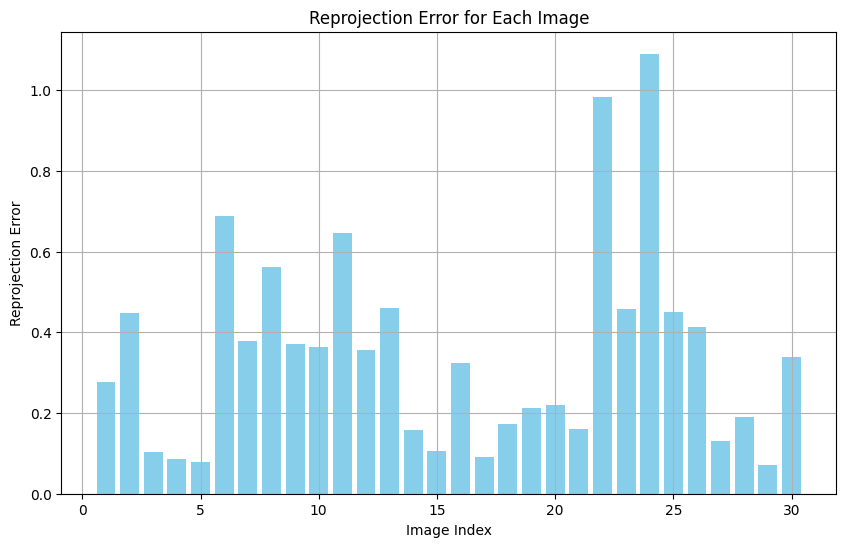

Mean Reprojection Error: 0.34632004720324583
Standard Deviation of Reprojection Error: 0.2497168816265701


In [144]:
reprojection_errors = []

for i, img_points in enumerate(imgpoints):
    # Project 3D object points to 2D image points
    img_points_reprojected, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    # Compute Euclidean distance between detected and reprojected points
    error = cv2.norm(img_points, img_points_reprojected, cv2.NORM_L2) / len(img_points)
    reprojection_errors.append(error)

# Plot the reprojection errors using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(reprojection_errors) + 1), reprojection_errors, color='skyblue')
plt.xlabel('Image Index')
plt.ylabel('Reprojection Error')
plt.title('Reprojection Error for Each Image')
plt.grid(True)
plt.show()

# Report mean and standard deviation of reprojection error
mean_error = np.mean(reprojection_errors)
std_dev_error = np.std(reprojection_errors)
print("Mean Reprojection Error:", mean_error)
print("Standard Deviation of Reprojection Error:", std_dev_error)


In [150]:
save_dir = 'q4_dataset\img_with_reprojection'

# Extracting path of individual image stored in a given directory
for image in images:
    pth = os.path.join(parent_dir, image)
    img = cv2.imread(pth)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, board, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display
    them on the images of checker board
    """
    if ret:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        
        # Project 3D object points to 2D image points
        img_points_reprojected, _ = cv2.projectPoints(objp, np.zeros((3,1)), np.zeros((3,1)), mtx, dist)
        
        # Draw detected corners on the image
        img_with_corners = cv2.drawChessboardCorners(img.copy(), board, corners2, ret)
        
        # Draw reprojected points on the image
        img_with_reprojection = cv2.drawChessboardCorners(img.copy(), board, img_points_reprojected, True)


        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Detected Corners')
        axes[0].axis('off')
        
        axes[1].imshow(cv2.cvtColor(img_with_reprojection, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Reprojected Points')
        axes[1].axis('off')

        # Save the plot
        save_path = os.path.join(save_dir, f'{image[:-4]}_corners_reprojection.jpeg')
        plt.savefig(save_path)
        plt.close()


        
        # # Display the original image with detected corners and reprojected points
        # plt.figure(figsize=(12, 6))
        # plt.subplot(1, 2, 1)
        # plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        # plt.title('Detected Corners')
        # plt.axis('off')
        
        # plt.subplot(1, 2, 2)
        # plt.imshow(cv2.cvtColor(img_with_reprojection, cv2.COLOR_BGR2RGB))
        # plt.title('Reprojected Points')
        # plt.axis('off')
        
        # plt.show()


In [146]:
normals_cam = []


In [147]:
camera_matrix = np.loadtxt('q4_dataset\camera_matrix.txt')
dist_coeffs = np.loadtxt('q4_dataset\distortion_coefficients.txt')


In [154]:
for image_name in images:
    pth = os.path.join(parent_dir, image_name)
    img = cv2.imread(pth)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, board, None)
    
    if ret:
        # Refine corner positions
        corners_subpix = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
        
        # Compute rotation and translation vectors using solvePnPRansac
        _, rvec, tvec, inliers = cv2.solvePnPRansac(objp, corners_subpix, camera_matrix, dist_coeffs)
        
        # Convert rotation vector to rotation matrix
        R, _ = cv2.Rodrigues(rvec)
        
        # Board plane normal in world coordinate frame
        normal_world = np.array([0, 0, 1])  # Assuming the board lies in the XY plane with Z=0
        
        # Transform board plane normal to camera coordinate frame
        normal_cam = np.dot(R.T, normal_world)
        
        # Normalize the normal vector
        normal_cam /= np.linalg.norm(normal_cam)
        
        # Append the normal to the list
        normals_cam.append(normal_cam)

# Write the computed normals to a text file
output_file = os.path.join('q4_dataset','board_plane_normals_camera_coordinate_frame.txt')
with open(output_file, 'w') as f:
    for i, normal_cam in enumerate(normals_cam):
        f.write(f"Image {i+1} - Board plane normal in camera coordinate frame: {normal_cam}\n")

print(f"Board plane normals in camera coordinate frame written to '{output_file}'.")


Board plane normals in camera coordinate frame written to 'q4_dataset\board_plane_normals_camera_coordinate_frame.txt'.
